In [9]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.7.0
2.7.0


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [11]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/var/folders/3t/bh3b870n50l8_xwgnc5hdq900000gn/T/ipykernel_29623/357239312.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
/var/folders/3t/bh3b870n50l8_xwgnc5hdq900000gn/T/ipykernel_29623/357239312.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [12]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


In [13]:
from keras.callbacks import ModelCheckpoint

In [14]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4200      
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [15]:
save_best_model = ModelCheckpoint("wagi_best.h5py",save_best_only=True)
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [17]:
save_best_model = ModelCheckpoint("wagi_best.h5py",save_best_only=True)
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=10, callbacks=[save_best_model])

Epoch 1/10
943/943 [==============================] - ETA: 0s - loss: 0.3944 - accuracy: 0.8037

2022-05-24 17:15:25.438169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: wagi_best.h5py/assets
943/943 [==============================] - 7s 7ms/step - loss: 0.3944 - accuracy: 0.8037 - val_loss: 0.4037 - val_accuracy: 0.7811
Epoch 2/10
  1/943 [..............................] - ETA: 6s - loss: 0.3113 - accuracy: 0.8750

2022-05-24 17:15:26.826683: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


943/943 [==============================] - 7s 7ms/step - loss: 0.3752 - accuracy: 0.8115 - val_loss: 0.3774 - val_accuracy: 0.8025
Epoch 3/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3726 - accuracy: 0.8126 - val_loss: 0.3681 - val_accuracy: 0.8149
Epoch 4/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3705 - accuracy: 0.8111 - val_loss: 0.3672 - val_accuracy: 0.8157
Epoch 5/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3711 - accuracy: 0.8143 - val_loss: 0.3684 - val_accuracy: 0.8110
Epoch 6/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3662 - accuracy: 0.8195 - val_loss: 0.3664 - val_accuracy: 0.8165
Epoch 7/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3691 - accuracy: 0.8146 - val_loss: 0.3685 - val_accuracy: 0.8116
Epoch 8/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3692 - accuracy: 0.8151 - val_loss: 0.3647 - val_accuracy: 0.8167
Epoch 9/10
943/94

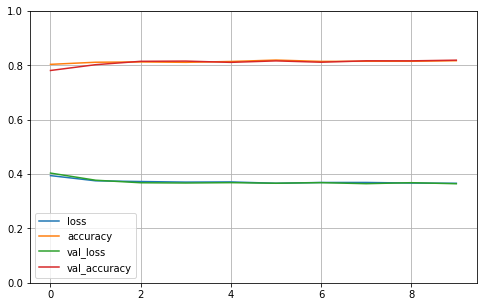

In [18]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [19]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 2s 3ms/step - loss: 0.3645 - accuracy: 0.8191


[0.36448934674263, 0.8190571665763855]

In [21]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= (model.predict(X_test) > 0.5).astype("int32") )

2022-05-24 17:16:52.091303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


0.8190571049136787

# Zad

Wczytaj nauczony model

In [23]:
model = keras.models.load_model('wagi_best.h5py')
model.evaluate(X_test,y_test)

 42/471 [=>............................] - ETA: 1s - loss: 0.3967 - accuracy: 0.7887

2022-05-24 17:17:55.794846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


471/471 [==============================] - 2s 3ms/step - loss: 0.3645 - accuracy: 0.8191


[0.36448934674263, 0.8190571665763855]

# Zad

* Naucz dowolny model na zbiorze MNIST.
* Zapisz optymalne parametry uczenia do pliku
* Wczytaj dane z pliku

In [24]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_valid = np_utils.to_categorical(y_valid)

print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [25]:
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Dropout

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.3),
    
    keras.layers.Dense(300, activation="relu"),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.3),
    
    keras.layers.Dense(100, activation="relu"),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.3),
    
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                      

In [28]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [29]:
save_best_model2 = ModelCheckpoint("wagi_best.h5py",save_best_only=True)
history2 = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=10, callbacks=[save_best_model])

Epoch 1/10


2022-05-24 17:20:36.166852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.5219 - accuracy: 0.8447

2022-05-24 17:20:54.382273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: wagi_best.h5py/assets
1719/1719 [==============================] - 20s 11ms/step - loss: 0.5219 - accuracy: 0.8447 - val_loss: 0.2801 - val_accuracy: 0.9302
Epoch 2/10
1719/1719 [==============================] - 20s 12ms/step - loss: 0.4021 - accuracy: 0.8807 - val_loss: 0.2325 - val_accuracy: 0.9388
Epoch 3/10
1719/1719 [==============================] - 20s 11ms/step - loss: 0.3487 - accuracy: 0.8956 - val_loss: 0.2042 - val_accuracy: 0.9462
Epoch 4/10
1719/1719 [==============================] - 20s 12ms/step - loss: 0.3099 - accuracy: 0.9078 - val_loss: 0.1824 - val_accuracy: 0.9504
Epoch 5/10
1719/1719 [==============================] - 21s 12ms/step - loss: 0.2861 - accuracy: 0.9139 - val_loss: 0.1627 - val_accuracy: 0.9574
Epoch 6/10
1719/1719 [==============================] - 20s 12ms/step - loss: 0.2646 - accuracy: 0.9197 - val_loss: 0.1513 - val_accuracy: 0.9600
Epoch 7/10
1719/1719 [==============================] - 20s 11ms/step - loss: 

In [30]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.1334 - accuracy: 0.9643


[0.1333594173192978, 0.9643000364303589]

In [31]:
model = keras.models.load_model('wagi_best.h5py')
model.evaluate(X_test,y_test)

 19/313 [>.............................] - ETA: 1s - loss: 0.1424 - accuracy: 0.9572

2022-05-24 17:23:58.736500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 0.1334 - accuracy: 0.9643


[0.1333594173192978, 0.9643000364303589]